<a href="https://colab.research.google.com/github/rachelcynthia/Pests_Classification/blob/Pests_Classify_Algo/Pests_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all necessary libraries

In [ ]:
import pandas as pd
import PIL
from PIL import Image
from numpy import asarray
import numpy as np
from ast import literal_eval
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
import datetime
import matplotlib.pyplot as plt

# Getting the pest data

In [ ]:
Pests_info = pd.read_csv("/content/drive/MyDrive/Pests Dataset/Pests_info_dataset.csv")
Pests_info

,Name,Description,Pesticide_Or_Insecticide,Natural_Ingredient,Found_In
0,Aphid,Soft-bodied insects that can be green or grey ...,flonicamid 50 WG @ 4gImidacloprid 200 SL @ 2.5...,Add lady beetles or lacewigs or syrphid flies ...,Potato; Sugarcane; Papaya
1,Caterpillar,The larval stages of moths or butterflies. It ...,B.t Toxin @ 1.0 kg in 1125 litres of water per...,Removing plant weeds and debris; Destroy webbi...,Apple; Cherry; Plum; Aspen; Milkweed
2,Cutworm,Cutworms hide in the soil by day and attack pl...,carbaryl 50 WP @2.5 kg/ha; quinalphos 20 EC@2 ...,Remove weeds and stubles;,Asparagus; Beans; Cabbage; Corn; Lettuce; Pota...
3,Earhead Bug,A broad headed bug that feed on developing ric...,Malathion 50 EC 500 ml/ha; Neem seed kernel ex...,Avoid close planting and provide 30 cm rogue s...,Rice
4,Locust,Locusts consume leaves and the tender tissues ...,Dusting the crop with 5-10% methyl parathion 2...,Release ants or dogs in the plants,Corn; Oats; Peanuts
5,Mites,Mites have eight legs compared to insects (whi...,Systemic miticides; Spiromesifen at 72 g a.i/ha.,Plowing stubble after harvesting crops; Sampli...,Asparagus; Beetroot; Carrots; Parsnips; Peas; ...
6,Slaters,Slaters or woodlice are small crustaceans that...,None,Put some hollowed out orange halves; seedling ...,Melons; Strawberriies; Pot plants
7,Stem Borer,The stem borer larvae bore at the base of the ...,Flubendiamide 48 SC @ 2.5 ml; chlorantrinilipr...,At seedbed and transplanting handpick and dest...,Rice; Paddy
8,Thrips,Thrips are 1–2mm long torpedo-shaped insects t...,Treat seeds with imidacloprid 70% WS @ 12 g/kg...,Inter crop with pther crops that provide shade,Rice; Paddy
9,Weevil,At night the 10mm adults may attack stems and ...,Apply Neem cake @ 500 kg/ha at the time of las...,Collect and destroy adults,Asparagus; Beetroot; Carrots; Parsnips; Peas; ...


# Getting the training data and modifying it

In [ ]:
training_set = pd.read_csv("/content/drive/MyDrive/Pests Dataset/training_set.csv")
training_set

,Unnamed: 0,labels,image
0,0,aphid,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
1,1,aphid,"[[179, 208, 188, 203, 232, 210, 196, 226, 202,..."
2,2,aphid,"[[140, 184, 148, 140, 184, 148, 140, 184, 148,..."
3,3,aphid,"[[143, 174, 55, 128, 159, 39, 135, 166, 46, 13..."
4,4,aphid,"[[245, 255, 216, 244, 255, 216, 249, 255, 221,..."
...,...,...,...
175,175,whitefly,"[[67, 93, 46, 67, 93, 46, 68, 94, 47, 68, 94, ..."
176,176,whitefly,"[[88, 104, 68, 88, 104, 68, 88, 104, 68, 87, 1..."
177,177,whitefly,"[[91, 87, 50, 88, 84, 47, 83, 79, 42, 78, 74, ..."
178,178,whitefly,"[[151, 162, 184, 150, 162, 184, 150, 162, 186,..."


In [ ]:
x = training_set['image']
x

0      [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
1      [[179, 208, 188, 203, 232, 210, 196, 226, 202,...
2      [[140, 184, 148, 140, 184, 148, 140, 184, 148,...
3      [[143, 174, 55, 128, 159, 39, 135, 166, 46, 13...
4      [[245, 255, 216, 244, 255, 216, 249, 255, 221,...
                             ...                        
175    [[67, 93, 46, 67, 93, 46, 68, 94, 47, 68, 94, ...
176    [[88, 104, 68, 88, 104, 68, 88, 104, 68, 87, 1...
177    [[91, 87, 50, 88, 84, 47, 83, 79, 42, 78, 74, ...
178    [[151, 162, 184, 150, 162, 184, 150, 162, 186,...
179    [[100, 149, 84, 86, 135, 70, 108, 157, 92, 107...
Name: image, Length: 180, dtype: object

In [ ]:
y = training_set['labels']
y

0         aphid
1         aphid
2         aphid
3         aphid
4         aphid
         ...   
175    whitefly
176    whitefly
177    whitefly
178    whitefly
179    whitefly
Name: labels, Length: 180, dtype: object

Classify the insects as numbers from 1 to 12

In [ ]:
Insect_Numbers = {'aphid':1,'caterpillar':2,'cutworm':3,'earheadbug':4,'leafhopper':5,'locust':6,'mites':7,'slaters':8,'stemborer':9,'thrips':10,'weevil':11,'whitefly':12}

In [ ]:
y_train = np.array([Insect_Numbers[insect] for insect in y])

In [ ]:
for i in range(len(x)):
  a = np.array(literal_eval(x[i]))
  a = a.astype(np.uint8)
  x[i] = a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
x = np.array([i for i in x])
x

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


array([array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
       array([[179, 208, 188, ..., 161, 183, 162],
       [182, 211, 191, ..., 165, 189, 167],
       [181, 210, 188, ..., 168, 192, 170],
       ...,
       [169, 211, 175, ..., 138, 168, 140],
       [181, 223, 183, ..., 150, 179, 151],
       [182, 225, 179, ..., 158, 187, 159]], dtype=uint8),
       array([[140, 184, 148, ..., 124, 172, 112],
       [132, 176, 140, ..., 114, 163,  98],
       [119, 163, 127, ...,  99, 149,  78],
       ...,
       [ 80, 113,  44, ...,  80, 128,  42],
       [ 82, 115,  46, ...,  79, 127,  41],
       [ 82, 115,  46, ...,  79, 127,  41]], dtype=uint8),
       array([[143, 174,  55, ..., 118, 141,  50],
       [145, 176,  57, ..., 105, 128,  37],
       [137

In [ ]:
x_train=[]
for i in range(len(x)):
  im = Image.fromarray(x[i])
  im = im.resize((28,28))
  ar = np.asarray(im)
  #ar = ar.tolist()
  #ar1 = [y for y in ar]
  x_train.append(ar)
x_train = np.array(x_train)
x_train.shape

(180, 28, 28)

Example of the data stored:

In [ ]:
im = Image.fromarray(x_train[45])
im

# Getting the test data and modifying it

In [ ]:
test_set = pd.read_csv("/content/drive/MyDrive/Pests Dataset/test_set.csv")
test_set

,Unnamed: 0,labels,image
0,0,aphid,"[[140, 184, 148, 140, 184, 148, 140, 184, 148,..."
1,1,aphid,"[[229, 239, 202, 227, 238, 198, 224, 235, 192,..."
2,2,aphid,"[[36, 40, 5, 35, 41, 5, 34, 40, 4, 34, 40, 2, ..."
3,3,aphid,"[[62, 109, 54, 68, 115, 60, 63, 111, 53, 31, 7..."
4,4,aphid,"[[143, 174, 55, 128, 159, 39, 135, 166, 46, 13..."
5,5,caterpillar,"[[98, 85, 43, 99, 86, 44, 102, 91, 46, 106, 95..."
6,6,caterpillar,"[[81, 143, 18, 78, 138, 14, 84, 144, 22, 79, 1..."
7,7,caterpillar,"[[158, 207, 160, 160, 209, 162, 162, 209, 165,..."
8,8,caterpillar,"[[2, 2, 0, 2, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,..."
9,9,caterpillar,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."


In [ ]:
x_t = test_set['image']
x_t

In [ ]:
y_test = test_set['labels']
y_test

0           aphid
1           aphid
2           aphid
3           aphid
4           aphid
5     caterpillar
6     caterpillar
7     caterpillar
8     caterpillar
9     caterpillar
10        cutworm
11        cutworm
12        cutworm
13        cutworm
14        cutworm
15     earheadbug
16     earheadbug
17     earheadbug
18     earheadbug
19     earheadbug
20     leafhopper
21     leafhopper
22     leafhopper
23     leafhopper
24     leafhopper
25         locust
26         locust
27         locust
28         locust
29         locust
30          mites
31          mites
32          mites
33          mites
34          mites
35        slaters
36        slaters
37        slaters
38        slaters
39        slaters
40      stemborer
41      stemborer
42      stemborer
43      stemborer
44      stemborer
45         thrips
46         thrips
47         thrips
48         thrips
49         thrips
50         weevil
51         weevil
52         weevil
53         weevil
54         weevil
55       w

In [ ]:
y_test = np.array([Insect_Numbers[insect] for insect in y_test])
y_test

array([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 12, 12, 12, 12, 12])

In [ ]:
for i in range(len(x_t)):
  a = np.array(literal_eval(x_t[i]))
  a = a.astype(np.uint8)
  x_t[i] = a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
x_test=[]
for i in range(len(x_t)):
  im = Image.fromarray(x_t[i])
  im = im.resize((28,28))
  ar = np.asarray(im)
  #ar = ar.tolist()
  #ar1 = [y for y in ar]
  x_test.append(ar)
x_test = np.array(x_test)
x_test.shape

(60, 28, 28)

Normalize the data

In [ ]:
x_train = x_train/255.0
x_train = np.array(x_train)
x_train[0]

In [ ]:
x_train.dtype

dtype('float64')

In [ ]:
x_test = x_test/255.0
x_test = np.array(x_test)
x_test.dtype

dtype('float64')

# The Model(Create, Fit, Evaluate)

In [ ]:
def create_model():
  model=Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(512,activation='relu'))
  model.add(Dense(13,activation='softmax'))
  return model

Compile the model

In [ ]:
# Clear logs
!rm -rf ./logs/
model=create_model()
model.summary()
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
log_dir="logs/fit/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback= TensorBoard(log_dir=log_dir,histogram_freq=1)
earlystopping_callback = EarlyStopping(
    monitor='val_loss',min_delta=0,patience=3,verbose=0,mode='auto',
    baseline=None,restore_best_weights=True
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 13)                6669      
Total params: 408,589
Trainable params: 408,589
Non-trainable params: 0
_________________________________________________________________


Fit the model

In [ ]:
model.fit(x_train,y_train,epochs=20,validation_split=0.1,callbacks=[tensorboard_callback,earlystopping_callback])

Epoch 1/20
6/6 [==============================] - 1s 44ms/step - loss: 2.7486 - accuracy: 0.1083 - val_loss: 5.3427 - val_accuracy: 0.0000e+00
Epoch 2/20
6/6 [==============================] - 0s 12ms/step - loss: 2.6893 - accuracy: 0.0722 - val_loss: 6.2020 - val_accuracy: 0.0000e+00
Epoch 3/20
6/6 [==============================] - 0s 12ms/step - loss: 2.5927 - accuracy: 0.1237 - val_loss: 6.4407 - val_accuracy: 0.0000e+00
Epoch 4/20
6/6 [==============================] - 0s 13ms/step - loss: 2.5231 - accuracy: 0.1499 - val_loss: 6.0198 - val_accuracy: 0.1111


Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

2/2 [==============================] - 0s 6ms/step - loss: 2.8922 - accuracy: 0.1333


# Predictions with test set

In [ ]:
predictions = model.predict(x_test)
predictions.shape

(60, 13)

In [ ]:
class_names =['','aphid','caterpillar','cutworm','earheadbug','leafhopper','locust','mites','slaters','stemborer','thrips','weevil','whitefly']

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

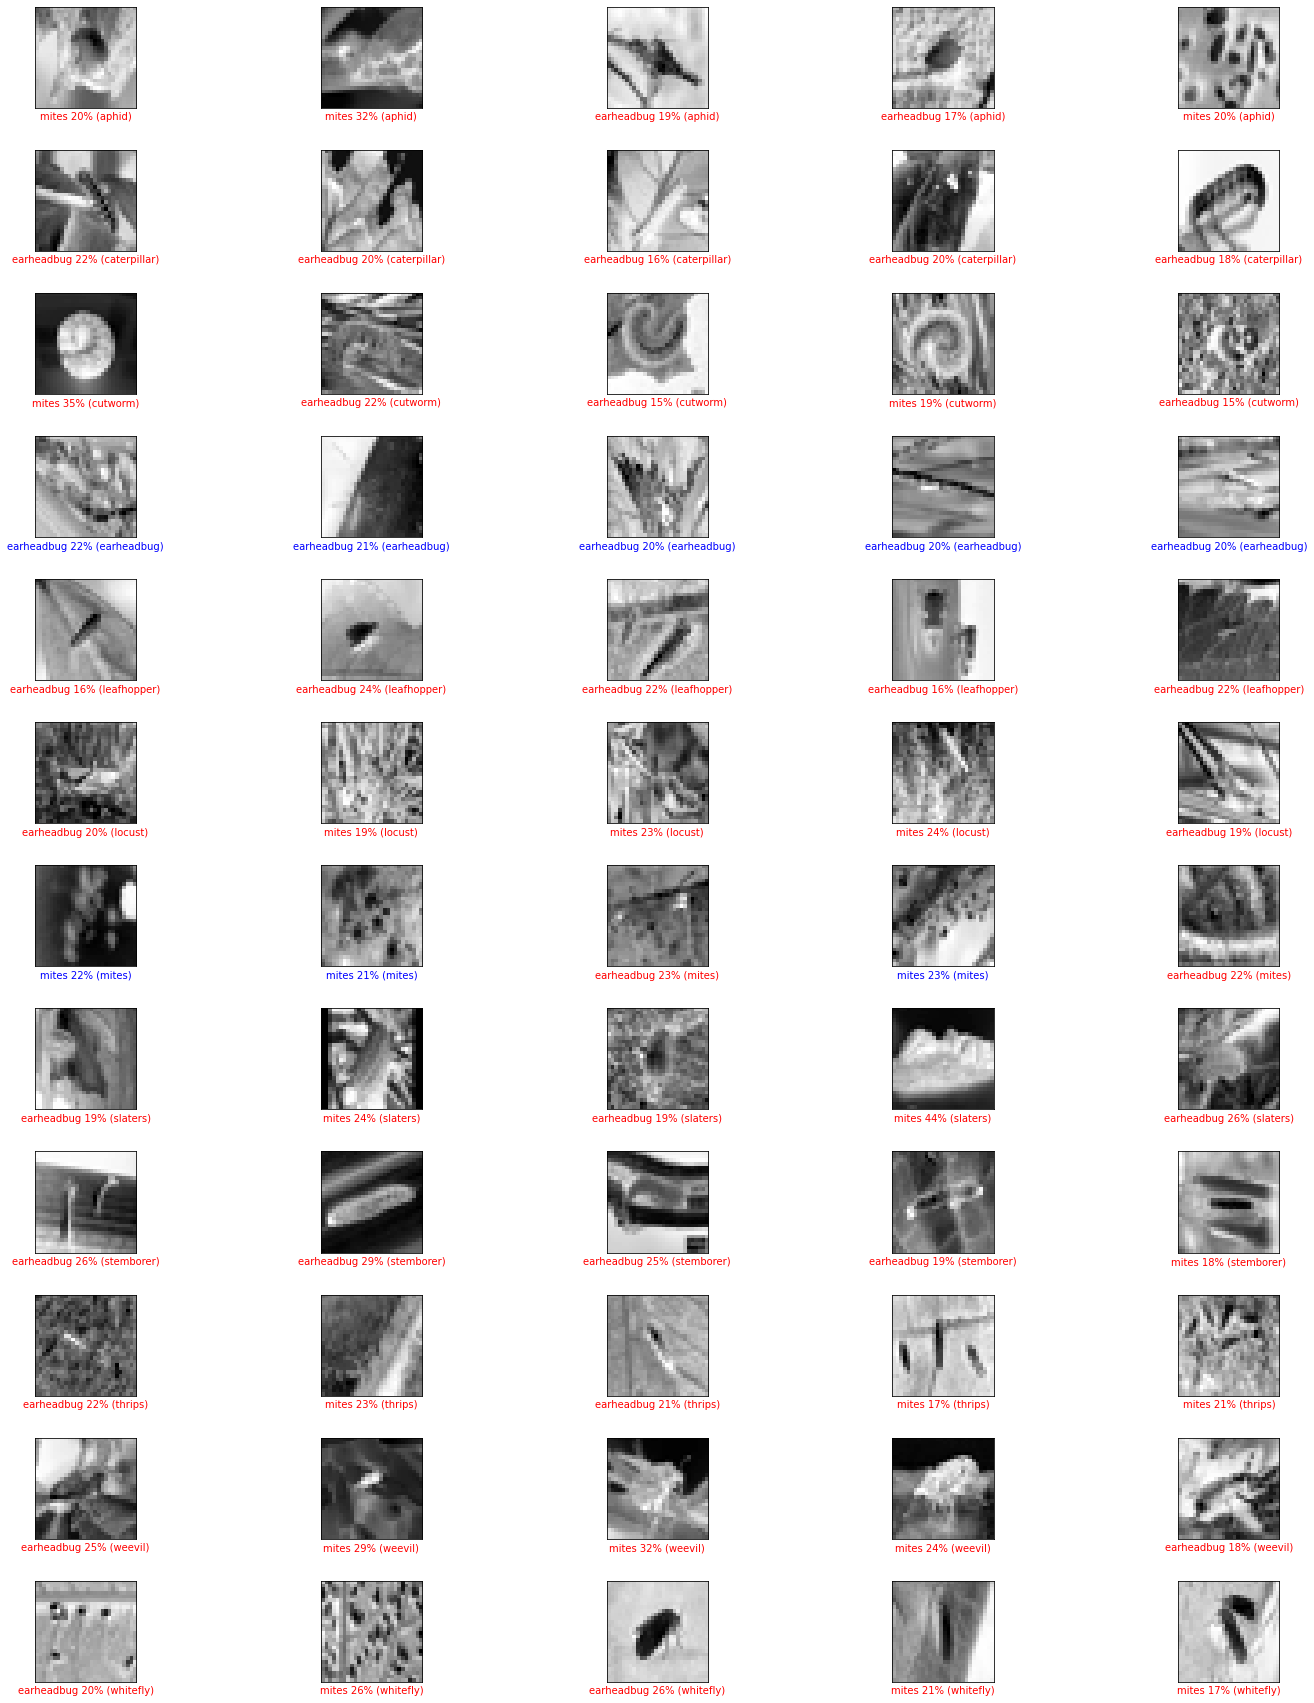

In [ ]:
num_rows = 12
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
plt.tight_layout()
plt.show()

In [ ]:
img = 